In [1]:
# Load example subjects

import pickle
import numpy as np

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP/'
demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

basis_file = '/home/anton/Documents/Tulane/Research/BSNIP/AngleBasis1.pkl'
basis = pickle.load(open(basis_file, 'rb'))

fc = []
age = []
sex = []
race = []
sz = []
thetas = []
jitter = []

for sub in demo['Age_cal']:
    try:
        a = demo['Age_cal'][sub]
        s = demo['sex'][sub] == 's1.0'
        r = demo['Race'][sub]
        if r not in ['AA', 'CA']:
            continue
        r = r == 'AA'
        z = demo['DXGROUP_1'][sub] != 'NC'
        p = np.load(f'{demodir}/fc/{sub}_task-unk_fc.npy')
        t = basis[sub]['thetas']
        j = basis[sub]['jitter']
    except:
        continue
    age.append(a)
    sex.append(s)
    race.append(r)
    sz.append(z)
    fc.append(p)
    thetas.append(t)
    jitter.append(j)
    
fc = np.stack(fc)
age = np.array(age)
sex = np.array(sex)
race = np.array(race)
sz = np.array(sz)
thetas = np.stack(thetas)
jitter = np.stack(jitter)

print(fc.shape, age.shape)

(1165, 34716) (1165,)


In [95]:
def rmse(yhat, y):
    if isinstance(yhat, np.ndarray) or isinstance(yhat, int):
        f = np.mean
    else:
        f = torch.mean
    return f((y-yhat)**2)**0.5

def tops(thetas, jitter):
    t0 = np.expand_dims(thetas, 2)
    t1 = np.expand_dims(thetas, 3)
    j0 = np.expand_dims(jitter, 2)
    j1 = np.expand_dims(jitter, 3)
    ps = np.cos(t0-t1)*(j0*j1)
    a,b = np.triu_indices(264, 1)
    ps = ps[:,:,a,b]
    return ps
    
ps = tops(thetas, jitter)
ab1 = np.mean(ps, axis=1)
res1 = fc - ab1

print(ps.shape)
print(ab1.shape)
print(res1.shape)

(1165, 1, 34716)
(1165, 34716)
(1165, 34716)


In [15]:
# Jitter Only

import matplotlib.pyplot as plt

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[:,a,b]

a,b = np.triu_indices(264,1)
X = np.ones((fc.shape[0],264,264))
X[:,a,b] = fc
X[:,b,a] = fc
w, v = np.linalg.eig(X)
print('Done eigs')

w[:,1:] = 0
part = np.einsum('nab,nb->nab',v,w)
top1 = np.real(np.einsum('nab,ncb->nac',part,v))
top1 = mat2vec(top1)
res1 = fc-top1
print('Done 1')

part = None
w = None
v = None
X = None

Done eigs
Done 1


In [104]:
# Try prediction

def rmse(yhat, y):
    return np.mean((yhat-y)**2)**0.5

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

xtr, xt, xtr0, xt0, xtr1, xt1, ytr, yt = train_test_split(fc, ab1, res1, age, train_size=0.1)

reg = Ridge(alpha=1).fit(xtr, ytr)
yhat = reg.predict(xt)
print(rmse(yt, yhat))

reg = Ridge(alpha=1).fit(xtr0, ytr)
yhat = reg.predict(xt0)
print(rmse(yt, yhat))

reg = Ridge(alpha=1).fit(xtr1, ytr)
yhat = reg.predict(xt1)
print(rmse(yt, yhat))

print(rmse(yt, np.mean(ytr)))

12.096558881088447
13.795871064137279
12.30243561888877
13.950456574491135


In [12]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


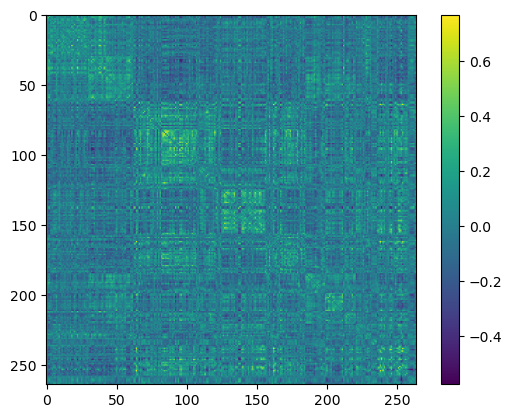

In [105]:
import matplotlib.pyplot as plt

plt.imshow(remap(vec2mat(res1[0])))
plt.colorbar()
plt.show()

In [84]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

class RidgeLow(nn.Module):
    def __init__(self):
        super(RidgeLow, self).__init__()
        self.A = nn.Parameter(0.001*torch.randn(1,264,100).float().cuda())
        self.fcm = nn.Linear(34716,1).float().cuda()
        self.fc0 = nn.Linear(4,30).float().cuda()
        self.fc1 = nn.Linear(30,1).float().cuda()
        self.i, self.j = np.triu_indices(264,1)
        
    def gen(self):
        A = torch.einsum('abc,adc->bda', self.A, self.A)
        return A[self.i,self.j]
        
    def forward(self, x, sex, race, sz):
        A = self.gen()
        x = torch.einsum('nf,fd->n',x,A)
#         x = self.fcm(x).squeeze()
        return x
        x = torch.cat([x, sex.unsqueeze(1), race.unsqueeze(1), sz.unsqueeze(1)], dim=1)
        y = F.relu(self.fc0(x)).squeeze()
        y = self.fc1(y).squeeze()
        return y
    
print('Complete')

Complete


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

nepochs = 2000
pperiod = 50

xtr, xt, x1, x2, x3, x4, x5, x6, ytr, yt = [torch.from_numpy(x).float().cuda() 
                                            for x in train_test_split(res1, sex, race, sz, age, train_size=0.5)]

# mu = torch.mean(xtr, dim=0, keepdims=True)
# xtr = xtr-mu
# xt = xt-mu

mu = torch.mean(ytr, dim=0)
ytr = ytr-mu
yt = yt-mu

reg = Ridge(alpha=1).fit(xtr.detach().cpu().numpy(), ytr.detach().cpu().numpy())
yhat = reg.predict(xt.detach().cpu().numpy())
print(np.mean((yhat-yt.detach().cpu().numpy())**2)**0.5)

# reg = LatSimReg(alpha=1).fit(xtr, ytr)
# yhat = reg.predict(xt)
# print(np.mean((yhat-yt)**2)**0.5)

rl = RidgeLow()
optim = torch.optim.Adam(rl.parameters(), lr=1e-4, weight_decay=1e-4)

for e in range(nepochs):
    optim.zero_grad()
    yhat = rl(xtr, x1, x3, x5)
    loss = torch.mean((ytr-yhat)**2)**0.5
    loss.backward()
    optim.step()
    if e % pperiod == 0 or e == nepochs-1:
        print(f'{e} {float(loss)}')
        
yhat = rl(xt, x2, x4, x6)

with torch.no_grad():
    rmse = torch.mean((yt-yhat)**2)**0.5
    print(rmse)

/usr/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


11.259028901798034
0 13.676311492919922
50 13.56676959991455
100 13.134967803955078
150 12.53102970123291
200 11.892486572265625
250 11.24140739440918
300 10.573904037475586
350 9.883843421936035
400 9.170709609985352
450 8.438257217407227
500 7.691943645477295
550 6.937866687774658
600 6.182771682739258
650 5.433835029602051
700 4.697744369506836
750 3.9792230129241943
800 3.279855728149414
850 2.5981502532958984
900 1.9313089847564697
950 1.2785433530807495
1000 0.6463872790336609
1050 0.07096169143915176
1100 0.014386449940502644
1150 0.010815667919814587
1200 0.007464952766895294
1250 0.0056653390638530254
1300 0.01257214043289423
1350 0.006921061780303717
1400 0.005227230489253998
1450 0.00658827368170023
1500 0.005823510233312845
1550 0.0058745951391756535
1600 0.004765143617987633
1650 0.005757769104093313
1700 0.004129736218601465
1750 0.005153276026248932
1800 0.004317791201174259
1850 0.004379834979772568
1900 0.004437565337866545
1950 0.0038507983554154634
1999 0.00441005406

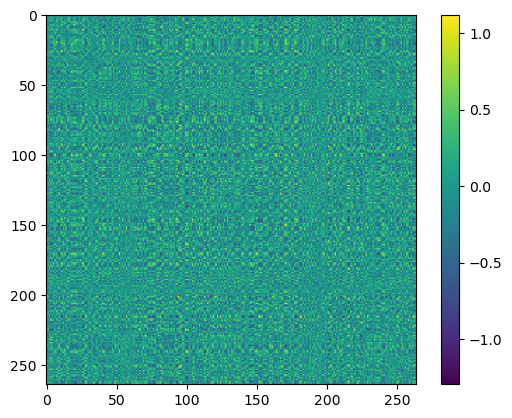

In [94]:
import matplotlib.pyplot as plt

A = rl.gen()

plt.imshow(remap(vec2mat(A[:,0].detach().cpu().numpy())))
plt.colorbar()
plt.show()


In [99]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

def mixup(xlow, xhigh):
    low = xlow.shape[0]
    high = xhigh.shape[0]
    X = torch.zeros(low*high, 34716).float().cuda()
    E = torch.zeros(low*high, low*high).float().cuda()
    for i in range(low):
        i0 = i*high
        i1 = (i+1)*high
        X[i0:i1] = xlow[i].unsqueeze(0)+xhigh
        for j in range(i0,i1):
            E[j,i0:i1] = 1
    return X, E

class CL(nn.Module):
    def __init__(self):
        super(CL, self).__init__()
        self.A = nn.Parameter(0.01*torch.randn(34716,10).float().cuda())
        self.b = nn.Parameter(0.1*torch.randn(34716).float().cuda())
    
    def sim(self, x, n):
        x = (x-self.b.unsqueeze(0))@self.A
        E = x@x.T
        E = n*F.softmax(E, dim=0)
        return E

cl = CL()
optim = torch.optim.Adam(cl.parameters(), lr=1e-4, weight_decay=1e-4)

nepochs = 5
pperiod = 50

for b in range(200):
    idcs = np.random.permutation(aps20.shape[0])
    idcs = idcs[:60]
    
    low = torch.from_numpy(aps20[idcs]).float().cuda()
    high = torch.from_numpy(res20[idcs]).float().cuda()
    X, E = mixup(low, high)
#     print(X.shape)
#     print(E.shape)

    for e in range(nepochs):
        optim.zero_grad()
        Ehat = cl.sim(X, 60)
        Ehat = (Ehat+Ehat.T)/2
        loss = torch.mean((E-Ehat)**2)**0.5
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {float(loss)}')

0 0.1357763111591339
4 0.12555815279483795
0 0.12563635408878326
4 0.12500174343585968
0 0.12433090806007385
4 0.12380657345056534
0 0.1256972849369049
4 0.1232680231332779
0 0.12658125162124634
4 0.12344399094581604
0 0.12394671887159348
4 0.12218131870031357
0 0.12183675915002823
4 0.119656503200531
0 0.12778818607330322
4 0.12304065376520157
0 0.1437513530254364
4 0.12722422182559967
0 0.12262915819883347
4 0.12073666602373123
0 0.12321281433105469
4 0.12120138853788376
0 0.13164199888706207
4 0.120078906416893
0 0.12117404490709305
4 0.11888765543699265
0 0.1214236170053482
4 0.11964824795722961
0 0.12318796664476395
4 0.11965826153755188
0 0.12176507711410522
4 0.11614392697811127
0 0.1208595335483551
4 0.11601866036653519
0 0.14615309238433838
4 0.12595833837985992
0 0.12684288620948792
4 0.12017232924699783
0 0.1310560554265976
4 0.11628194898366928
0 0.12334457039833069
4 0.11764951795339584
0 0.1427195817232132
4 0.1230185404419899
0 0.11994373798370361
4 0.11426261812448502
0

0 0.11989530920982361
4 0.09862697124481201
0 0.09890352189540863
4 0.08670075982809067
0 0.09357959032058716
4 0.0848381444811821
0 0.09450987726449966
4 0.08693443238735199
0 0.11589397490024567
4 0.08973352611064911
0 0.09751737117767334
4 0.08633296936750412
0 0.08849405497312546
4 0.08554685115814209
0 0.09324003756046295
4 0.08235786110162735
0 0.0941077396273613
4 0.0890139564871788
0 0.0860503762960434
4 0.07830572128295898
0 0.11880260705947876
4 0.09568808227777481
0 0.15490280091762543
4 0.10463115572929382


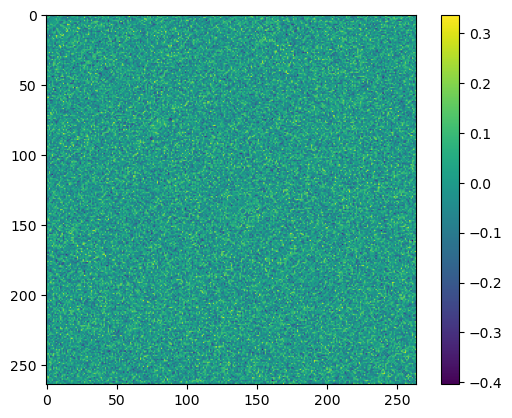

In [104]:
# plt.imshow(vec2mat(fc[0]))
# plt.imshow(vec2mat(X[3].detach().cpu().numpy()))
# plt.imshow(vec2mat(low[1].detach().cpu().numpy()))
# plt.imshow(vec2mat(high[0].detach().cpu().numpy()))
plt.imshow(vec2mat(cl.b.detach().cpu().numpy()))
plt.colorbar()
plt.show()

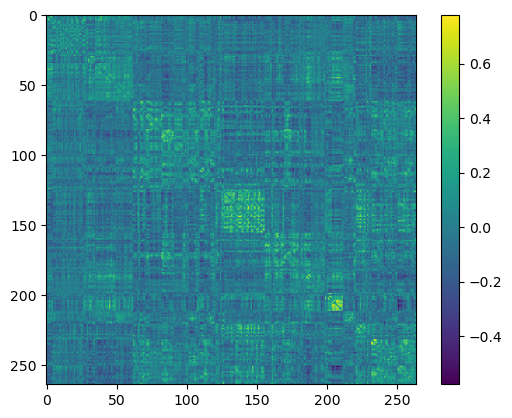

In [43]:
import matplotlib.pyplot as plt

plt.imshow(remap(vec2mat(res20[13])))
plt.colorbar()
plt.show()